In [47]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride, city, on = "city", how = "left")

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

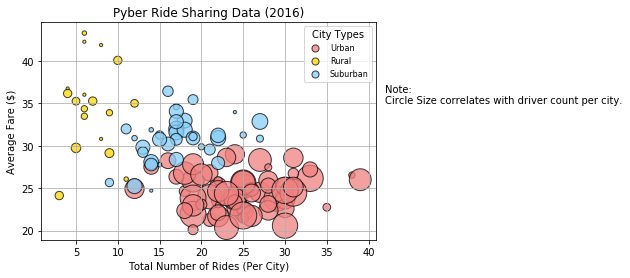

In [46]:
#Groupbys for each type
urban_gdf = df[df["type"] == "Urban"].groupby(df["city"])
rural_gdf = df[df["type"] == "Rural"].groupby(df["city"])
sub_gdf = df[df["type"] == "Suburban"].groupby(df["city"])

# Obtain the x and y coordinates for each of the three city types (z for size)

#Urban 
x_urban = urban_gdf["ride_id"].count()
y_urban = urban_gdf["fare"].mean()
z_urban = urban_gdf["driver_count"].mean()

#Rural
x_rural = rural_gdf["ride_id"].count()
y_rural = rural_gdf["fare"].mean()
z_rural = rural_gdf["driver_count"].mean()

#Sub
x_sub = sub_gdf["ride_id"].count()
y_sub = sub_gdf["fare"].mean()
z_sub = sub_gdf["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label="Urban", s=z_urban*10, color=["lightcoral"], edgecolor="black", alpha = 0.75, marker = "o")
plt.scatter(x_rural, y_rural, label="Rural", s=z_rural*10, color=["gold"], edgecolor="black", alpha = 0.75, marker = "o")
plt.scatter(x_sub, y_sub, label="Suburban", s=z_sub*10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker = "o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title="City Types", loc="best")

#Fix Legend sizes
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: \nCircle Size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/PyberScatter.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

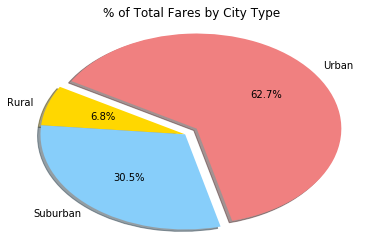

<Figure size 432x288 with 0 Axes>

In [41]:
# Calculate Type Percents
types_gdf = df.groupby(["type"])
fares = types_gdf["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fares, explode = explode, labels = labels, colors = colors, radius = 1, autopct = "%1.1f%%", shadow = True,
        startangle = 150)
plt.title("% of Total Fares by City Type")

#Pie Matching homework instructions
plt.axis("auto")
plt.show()

# Save Figure
plt.savefig("Images/FaresbyTypePie.png")

plt.show()

## Total Rides by City Type

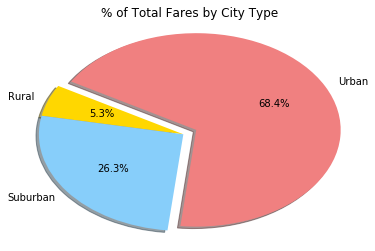

In [42]:
# Calculate Ride Percents
rides = types_gdf["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides, explode= explode, labels = labels, colors = colors, radius = 1, autopct = "%1.1f%%", shadow = True,
        startangle = 150)
plt.title("% of Total Fares by City Type")

#Change the graph to ellipse to match homework otherwise its a circle
plt.axis("auto")

# Save Figure
plt.savefig("Images/RidesbyTypePie.png")
# Show Figure
plt.show()

## Total Drivers by City Type

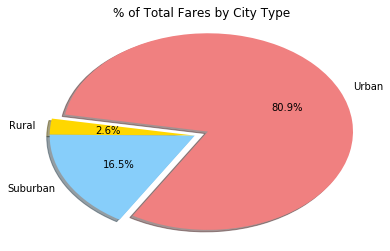

In [44]:
# Calculate Driver Percents
drivers_gdf = city.groupby(["type"])
drivers = drivers_gdf["driver_count"].sum()
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers, explode= explode, labels = labels, colors = colors, radius = 1, autopct = "%1.1f%%", shadow = True,
        startangle = 170)
plt.title("% of Total Fares by City Type")

#Change the graph to ellipse to match homework otherwise its a circle
plt.axis("auto")


# Save Figure
plt.savefig("Images/DriversbyTypePie.png")

# Show Figure
plt.show()